<a href="https://colab.research.google.com/github/takahiromiura/class-data-analysis-II-2024/blob/main/notebooks/%E3%81%BE%E3%81%A8%E3%82%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# まとめ

7 回までのまとめです。

## Pandas とは

データの読み込みおよび書き出し (入出力処理)、前処理などの操作、記述統計などの分析、グラフ作成など、多機能なライブラリ。

### pandas の読み込み

`pandas` で読み込む。
一般的には `pd` と略して使う。

In [1]:
import pandas as pd

## データ構造

`pandas` では 2 つのデータ構造を使ってデータを扱う。
一つは `Series` で、これは 1 次元のラベル付きのベクトル。
もう一つは `DataFrame` で、これは 2 次元のラベル付きのベクトル。

`Seies` や `DataFrame` はリストなどの配列をつかって作成できる。

In [2]:
pd.Series([1, 2, 3, 4, 5])

,0
0,1
1,2
2,3
3,4
4,5


In [3]:
pd.DataFrame([[1, 2, 3], [3, 4, 5]])

,0,1,2
0,1,2,3
1,3,4,5


また、`Series` では行のラベルをつけられる。
これは `index` (インデックス) という。
`DataFrame` ではさらに列のラベルをつけられる。
これを `column` (カラム) という。

これらはデータ作成時に指定する、または後から上書きできる。

In [4]:
pd.Series([1, 2, 3], index = ["one", "two", "three"])

,0
one,1
two,2
three,3


In [5]:
pd.DataFrame([[1, 2], [3, 4]], index = ["one", "two"], columns=["first", "second"])

,first,second
one,1,2
two,3,4


In [6]:
series = pd.Series([1, 2])
print("インデックス上書き前")
print(series)
series.index = ["one", "two"] # インデックスを上書き
print("-" * 20)
print("インデックス上書き後")
print(series)


インデックス上書き前
0    1
1    2
dtype: int64
--------------------
インデックス上書き後
one    1
two    2
dtype: int64


In [7]:
df = pd.DataFrame([[1, 2], [3, 4]])
print("インデックス・カラム上書き前")
print(df)
df.index = ["one", "two"]  # インデックスを上書き
df.columns = ["first", "second"] # カラムを上書き
print("-" * 20)
print("インデックス・カラム上書き後")
print(df)

インデックス・カラム上書き前
   0  1
0  1  2
1  3  4
--------------------
インデックス・カラム上書き後
     first  second
one      1       2
two      3       4


### データ型

リストやタプルなどは例えば `[1, "japan"]` などの異なるデータの種類 (型) を混合させられていた。
`pandas` では、`Series` および `DataFrame` の各カラムは一つのデータ型として扱われる。

データを作成したときに、自動的にどのデータ型かを推論してくれる。
データ型の確認は `Series` は `dtype`、`DataFrame` は `dtypes` で行う。

また、データ型を変えたい場合は `astype` メソッドを使う。

In [8]:
pd.Series([1, 2, 3])

,0
0,1
1,2
2,3


In [9]:
series = pd.Series([1, 2, 3.14])
print(series)
print("-" * 20)
print(series.dtype)

0    1.00
1    2.00
2    3.14
dtype: float64
--------------------
float64


In [10]:
df = pd.DataFrame([[1, 2], [3.14, 4]], columns = ["int", "float"])
print(df)
print("-" * 20)
print(df.dtypes)

    int  float
0  1.00      2
1  3.14      4
--------------------
int      float64
float      int64
dtype: object


In [11]:
series = pd.Series([1, 2, 3.14])
print("データ型変更前")
print(series)
print(series.dtype)
series = series.astype("int")
print("-" * 20)
print("データ型変更後")
print(series)
print(series.dtype)

データ型変更前
0    1.00
1    2.00
2    3.14
dtype: float64
float64
--------------------
データ型変更後
0    1
1    2
2    3
dtype: int64
int64


文字列や、数値と文字列の混合、リストなどのオブジェクトなどが入ったものは `object` 型として扱われる。

In [12]:
print(pd.Series(["japan"]).dtype)
print(pd.Series([1, 2, "three"]).dtype)
print(pd.Series([[1, 2]]).dtype)

object
object
object


### データの取り出し

辞書であるキーに対応する値を取り出したいときに `<dict>[key]` としたときのように、`[]` を使うと一部のデータを取り出せる。
ある `Series` オブジェクトに対して、特定のインデックスの値を取り出したいときに用いる。
一方で、`DataFrame` オブジェクトに対しては、特定のカラムを取り出したいときに用いることに注意。
`DataFrame` で特定のインデックスに基づいてデータを切り出したいときは `loc` プロパティを使う。

In [13]:
series = pd.Series([1, 2, 3], index=["A", "B", "C"])
print(series)
print("-" * 20)
print(series["A"])

A    1
B    2
C    3
dtype: int64
--------------------
1


In [14]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
print(df["price"])

    item  price
0  apple    100
1  melon   1000
--------------------
0     100
1    1000
Name: price, dtype: int64


また、`DataFrame` で一つのカラム名を指定して切り出したデータは `Series` である。

In [15]:
print(type(df["price"]))

<class 'pandas.core.series.Series'>


`data.<column_name>` でも取り出し可能。

In [16]:
series = pd.Series([1, 2, 3], index=["A", "B", "C"])
print(series)
print("-" * 20)
print(series.A)

A    1
B    2
C    3
dtype: int64
--------------------
1


In [17]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
print(df.price)

    item  price
0  apple    100
1  melon   1000
--------------------
0     100
1    1000
Name: price, dtype: int64


`[]` に文字列のリスト (または `Series`) を渡すと、`Series` なら指定した文字列に対応したものを抜き出した `Series`、`DataFrame` なら `DataFrame` が返ってくる。

In [18]:
series = pd.Series([1, 2, 3], index=["A", "B", "C"])
print(series)
print("-" * 20)
print(series[["A", "C"]])

A    1
B    2
C    3
dtype: int64
--------------------
A    1
C    3
dtype: int64


In [19]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
print(df[["item", "price"]])

    item  price
0  apple    100
1  melon   1000
--------------------
    item  price
0  apple    100
1  melon   1000


`[]` に `True` または `False` からなるブール (bool) 型のリストないしは `Series` を渡すと、`True` になっているインデックスのみを抜き出した `Series` (`DataFrame`) が返ってくる。

これは、ある条件にマッチしたデータのみを抜き出すときに有用である。

In [20]:
series = pd.Series([1, 2, 3], index=["A", "B", "C"])
print(series)
print("-" * 20)
print(series[[True, True, False]])

A    1
B    2
C    3
dtype: int64
--------------------
A    1
B    2
dtype: int64


In [21]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
print(df[[True, False]])

    item  price
0  apple    100
1  melon   1000
--------------------
    item  price
0  apple    100


## データの読み込み

`read_xxx` がファイル読み込みの関数である。
ファイル形式によって使う関数が異なる。

例えば、CSV ファイルを読み込む場合は `read_csv` 関数である。
関数にはファイルの置き場所 (パス) を指定する。

例えば、Colab のサンプルデータのカリフォルニア住宅データは次のように読み込む。

In [22]:
pd.read_csv("/content/sample_data/california_housing_train.csv")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## データの操作

### データの追加

辞書のときと同様、新しくデータを足したいときには `data["new_column"] = <value>` とする。
`Series` ならインデックス、`DataFrame` ならカラムが新しく足される。

In [23]:
series = pd.Series([1, 2, 3], index=["A", "B", "C"])
print(series)
print("-" * 20)
series["D"] = 10 # インデックスの追加
print(series)

A    1
B    2
C    3
dtype: int64
--------------------
A     1
B     2
C     3
D    10
dtype: int64


`DataFrame` のカラムを足す際、文字列や数値などを指定すると、全てのインデックスに対して同じ値が格納される。

In [24]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
df["category"] = "fruits" # カラム追加
print(df)

    item  price
0  apple    100
1  melon   1000
--------------------
    item  price category
0  apple    100   fruits
1  melon   1000   fruits


インデックス (行) 毎に異なる値を入れたい場合は、リストや `Series` などの配列形式を渡す。
この時、配列の長さが対象のデータと同じ必要があることに注意。

In [25]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
df["price_with_tax"] = [100 * 1.1, 1000 * 1.1]  # カラム追加
print(df)

    item  price
0  apple    100
1  melon   1000
--------------------
    item  price  price_with_tax
0  apple    100           110.0
1  melon   1000          1100.0


### 四則演算・条件式

`Series` や `DataFrame` の各要素を 3 倍するとか、10 より大きいかなどの四則演算や条件式の検証ができる。
このとき、各要素が行いたい演算が可能かどうかに注意。
例えば、ある要素が "japan" であれば、割り算は適用できない。

そのため、`DataFrame` もできるが、`Series` で行ったほうが無難。

In [26]:
pd.Series([1, 2, 3]) * 100

,0
0,100
1,200
2,300


In [27]:
pd.Series([1, 2, 3]) > 2

,0
0,False
1,False
2,True


また、各インデックス毎に異なる値で演算や条件式を実行したい場合はリストや `Series` で行う。

`DataFrame` でも可能だが、カラム数が多いとバグになりやすいので推奨しない。

In [28]:
pd.Series([1, 2, 3]) * [1, 10, 100]

,0
0,1
1,20
2,300


In [29]:
pd.Series([1, 2, 3]) > [0, 1, 10]

,0
0,True
1,True
2,False


先ほどの `[]` を用いて、特定の条件にマッチする行を取り出せる。

In [30]:
series = pd.Series([1, 2, 3])
print(series)
print("-" * 20)
print(series[series > 1])


0    1
1    2
2    3
dtype: int64
--------------------
1    2
2    3
dtype: int64


In [31]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [100, 1000]})
print(df)
print("-" * 20)
print(df[df["price"] > 100])

    item  price
0  apple    100
1  melon   1000
--------------------
    item  price
1  melon   1000


`A` と `B` はブール型の `Series` とする。
`A & B` で A かつ B、`A | B` で A または B の条件式になる。

前後の条件式は `()` で閉じておくことに注意。

In [32]:
series = pd.Series([1, 2, 3])
print(series)
print("-" * 20)
print((series > 1) & (series <= 3)) # 1 より大きく、3 以下

0    1
1    2
2    3
dtype: int64
--------------------
0    False
1     True
2     True
dtype: bool


In [33]:
series = pd.Series([1, 2, 3])
print(series)
print("-" * 20)
print((series == 1) | (series >= 10))  # 1 か、10 以上

0    1
1    2
2    3
dtype: int64
--------------------
0     True
1    False
2    False
dtype: bool


`isin` メソッドを使えば配列内の各要素のどれかにマッチしたかを検証できる。

In [34]:
series = pd.Series([1, 2, 3])
print(series)
print("-" * 20)
print(series.isin([1, 3]))  # 1 か 3 か

0    1
1    2
2    3
dtype: int64
--------------------
0     True
1    False
2     True
dtype: bool


### ソート

`sort_values` で順番を並び替えられる。
`DataFrame` なら指定したカラムで並び替えを行う。

In [35]:
series = pd.Series([5, 2, 3])
print(series)
print("-" * 20)
print(series.sort_values())

0    5
1    2
2    3
dtype: int64
--------------------
1    2
2    3
0    5
dtype: int64


In [36]:
df = pd.DataFrame({"item": ["apple", "melon"], "price": [1000, 100]})
print(df)
print("-" * 20)
print(df.sort_values("price"))

    item  price
0  apple   1000
1  melon    100
--------------------
    item  price
1  melon    100
0  apple   1000


### インデックスの操作

`DataFrame` の `reset_index` メソッドはインデックスを連番で振りなおす。
デフォルトでは、元のインデックスは新しいカラムとして追加される。

`set_index` メソッドは、指定したカラムをインデックスとして用いる。

In [37]:
df = pd.DataFrame(
    {"item": ["apple", "melon"], "price": [1000, 100]}, index=["one", "two"]
)
print(df)
print("-" * 20)
print(df.reset_index())

      item  price
one  apple   1000
two  melon    100
--------------------
  index   item  price
0   one  apple   1000
1   two  melon    100


In [38]:
df = pd.DataFrame(
    {"item": ["apple", "melon"], "price": [1000, 100]}, index=["one", "two"]
)
print(df)
print("-" * 20)
print(df.set_index("item"))

      item  price
one  apple   1000
two  melon    100
--------------------
       price
item        
apple   1000
melon    100


## 記述統計・データの確認

### データの確認用の関数

- `len` 関数: データの長さを返す組み込み関数 (`pandas` の関数ではない)

In [39]:
series = pd.Series([1, 2, 3])
print(series)
print("-" * 20)
print(len(series))

0    1
1    2
2    3
dtype: int64
--------------------
3


In [40]:
df = pd.DataFrame({"item": ["apple", "melon"]})
print(df)
print("-" * 20)
print(len(df))

    item
0  apple
1  melon
--------------------
2


### データの確認用の属性

- `dtypes, dtypes`: データ型の確認
- `shape`: 行列数の確認
- `size`: 要素数 (行数 x 列数) の確認

In [41]:
df = pd.DataFrame({"item": ["apple", "melon", "orange"], "price": [100, 1000, 400]})
print(df)
print("-" * 20)
print(df.shape)

     item  price
0   apple    100
1   melon   1000
2  orange    400
--------------------
(3, 2)


In [42]:
df = pd.DataFrame({"item": ["apple", "melon", "orange"], "price": [100, 1000, 400]})
print(df)
print("-" * 20)
print(df.size)

     item  price
0   apple    100
1   melon   1000
2  orange    400
--------------------
6



### データの確認用のメソッド

- `head`: 先頭のデータを表示 (デフォルトは 5 行)
- `tail`: 末尾のデータを表示 (デフォルトは 5 行)
- `info`: カラム名、データ型、欠損値以外の数など
- `unique`: 重複しない値を返す
- `value_counts`: 値毎の数を数える

In [43]:
series = pd.Series([i for i in range(10)])
print(series)
print("-" * 20)
print(series.head())

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------------
0    0
1    1
2    2
3    3
4    4
dtype: int64


In [44]:
series = pd.Series([i for i in range(10)])
print(series)
print("-" * 20)
print(series.tail())

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------------
5    5
6    6
7    7
8    8
9    9
dtype: int64


In [45]:
df = pd.DataFrame({"item": ["apple", "melon", "orange"], "price": [100, 1000, 400]})
print(df)
print("-" * 40)
df.info()

     item  price
0   apple    100
1   melon   1000
2  orange    400
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    3 non-null      object
 1   price   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [46]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.unique())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
[1 2 3]


In [47]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.value_counts())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
1    3
2    1
3    1
Name: count, dtype: int64


## 記述統計用のメソッド

一部は `DataFrame` でも実装しているが、データ型が合わないとエラーになるので注意。

- `mean`: 平均値
- `median`: 中央値
- `max`: 最大値
- `min`: 最小値
- `quantile`: q * 10 % タイルの値を返す
- `describe`: 様々な記述統計値を返す

In [48]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.mean())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
1.6


In [49]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.median())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
1.0


In [50]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.max())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
3


In [51]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.min())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
1


In [52]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.quantile(0.75)) # 75% タイルの値
print("-" * 20)
print(series.quantile(0.25))  # 25% タイルの値

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
2.0
--------------------
1.0


In [53]:
series = pd.Series([1, 2, 1, 3, 1])
print(series)
print("-" * 20)
print(series.describe())

0    1
1    2
2    1
3    3
4    1
dtype: int64
--------------------
count    5.000000
mean     1.600000
std      0.894427
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      3.000000
dtype: float64


## グループ集計

`groupby` で指定した値毎に集計をすることができる。
集計したデータに対して、`mean` などの集計関数を適用する。

In [54]:
df = pd.DataFrame({
    "item": ["apple", "melon", "beef"],
     "price": [100, 1000, 2000],
    "category": ["fruits", "fruits", "meat"]
})
print(df)
print("-" * 40)
df.groupby("category")["price"].mean() # カテゴリー毎の価格の平均値

    item  price category
0  apple    100   fruits
1  melon   1000   fruits
2   beef   2000     meat
----------------------------------------


,price
category,
fruits,550.0
meat,2000.0


## 欠損値

収入などのセンシティブな質問に対する非回答や売り上げがなかった場合、値が入っていないことがある。
このような場合、該当の要素は欠損値という状態になっている。
欠損値は正しく対処しないと、誤った結論になることに注意。

`pandas` では `NaN` (Not a number) と `None` (欠損値) は同じに扱われる。

In [55]:
pd.Series([1, 2, None])

,0
0,1.0
1,2.0
2,NaN


In [56]:
pd.Series(["japan", "U.S.", None])

,0
0,japan
1,U.S.
2,None


### 欠損値の確認・欠損値以外の確認

`isnull` や `isna` メソッドは欠損値であれば `True` を返す。
逆に、`notnull` や `notna` メソッドは欠損値以外であれば `True` を返す。

In [57]:
pd.Series([1, 2, None]).isna()

,0
0,False
1,False
2,True


In [58]:
pd.Series(["japan", "U.S.", None]).isnull()

,0
0,False
1,False
2,True


In [59]:
pd.Series([1, 2, None]).notnull()

,0
0,True
1,True
2,False


In [60]:
pd.Series(["japan", "U.S.", None]).notna()

,0
0,True
1,True
2,False


### 欠損値の穴埋め

`fillna` メソッドを使うと、欠損値に値を埋めることができる。

どの値を埋め込むのが適切かは場合による。

In [61]:
series = pd.Series([1, 2, None])
print(series)
print("-" * 20)
print(series.fillna(0))

0    1.0
1    2.0
2    NaN
dtype: float64
--------------------
0    1.0
1    2.0
2    0.0
dtype: float64


### 欠損値のある行の削除

`dropna` メソッドを使うと、欠損値のある行を除外できる。

穴埋めの時と同様、除外しても問題ないかどうかは場合による。

In [62]:
series = pd.Series([1, 2, None])
print(series)
print("-" * 20)
print(series.dropna())

0    1.0
1    2.0
2    NaN
dtype: float64
--------------------
0    1.0
1    2.0
dtype: float64


## 文字列操作

`str` アクセッサーを介してメソッドを使うと、文字列に対する高度な操作が可能になる。

例えば、`contains` メソッドを使うと、指定したパターンが含まれているかどうかをチェックできる。

他にも以下のようなものがある。

- `[]`: スライス
- `fullmatch`: 文字列全体が指定したパターンと完全に一致するか
- `match`: 先頭の文字列パターンが指定したパターンと一致するか
- `extract`: 指定したパターンに合致するものを抜き出す
- `find`: 指定したパターンと合致する文字列のインデックス (番号) を返す

In [63]:
series = pd.Series(
    [
        "青森県",
        "東京都",
        "大阪府",
        "北海道",
        "和歌山県",
    ]
)
series.str.contains("県") # 県の文字が含まれているかどうか

,0
0,True
1,False
2,False
3,False
4,True


正規表現 (regular expression) という、パターンの表現方法を使うとさらに柔軟な条件で検証できる。

正規表現の説明は、例えば https://developer.mozilla.org/ja/docs/Web/JavaScript/Guide/Regular_expressions

In [64]:
series = pd.Series(["2023年", "こんにちは", "3回目の"])
print(series)
print("-" * 20)
print(series.str.contains(r"\d")) # 数値を含むかどうか

0    2023年
1    こんにちは
2     3回目の
dtype: object
--------------------
0     True
1    False
2     True
dtype: bool


## 時間型データ

数値や `object` 型だけでなく、時間型 (`datetime64`) も存在する。


### 時間型への変換

時間型への変換は `astype` ではなく `to_datetime` 関数を使う。

In [65]:
series = pd.Series(["2023-01-01", "2023-01-02", "2023-02-03",])
print(series)
print("-" * 20)
series = pd.to_datetime(series)
print(series)

0    2023-01-01
1    2023-01-02
2    2023-02-03
dtype: object
--------------------
0   2023-01-01
1   2023-01-02
2   2023-02-03
dtype: datetime64[ns]


### 時間型の操作

基本的には `dt` アクセッサーを介して属性・メソッドを使う。
次のようなものがある

- `year`: 年を返す
- `month`: 月を返す
- `day`: 日を返す
- `dayofweek`: 曜日の数値 (0: 月曜 ~ 6: 日曜) を返す

In [66]:
series = pd.to_datetime(
    pd.Series(
        [
            "2023-01-01",
            "2023-01-02",
            "2023-02-03",
        ],
    )
)
print(series)
print("-" * 20)
print(series.dt.year)

0   2023-01-01
1   2023-01-02
2   2023-02-03
dtype: datetime64[ns]
--------------------
0    2023
1    2023
2    2023
dtype: int32


`resample` メソッドは `groupby` のように、指定した時間の単位でデータを集計する。
時間の単位は年 (`YE`) や月 (`ME`) だけでなく、5 分毎 (`5Min`) なども可能。

ただし、`groupby` とは異なり、間の時間のデータも作成される。

In [67]:
sales_data = pd.DataFrame(
    {
        "日付": [
            "2023-01-01",
            "2023-01-05",
            "2023-02-01",
        ],
        "利益": [1000, 1500, 2000],
    },
)
sales_data["日付"] = pd.to_datetime(sales_data["日付"])
print(sales_data)
print("-" * 20)
print(sales_data.resample("W", on = "日付")["利益"].sum()) # 週毎の合計利益

          日付    利益
0 2023-01-01  1000
1 2023-01-05  1500
2 2023-02-01  2000
--------------------
日付
2023-01-01    1000
2023-01-08    1500
2023-01-15       0
2023-01-22       0
2023-01-29       0
2023-02-05    2000
Freq: W-SUN, Name: 利益, dtype: int64


## グラフ

`plot` メソッドおよび `plot` アクセッサー内の `bar` や `hist` などのメソッドを使って簡易的なグラフを作成できる。

- `plot`: `kind` でグラフの種類を指定する
- `line`: 折れ線グラフ
- `bar`: 棒グラフ
- `scatter`: 散布図
- `hist`: ヒストグラム
- `box`: 箱ひげ図

### 折れ線グラフ

時間による変化の視覚化などに用いる。

In [68]:
sales_data = pd.Series(
    [250, 270, 300, 280, 320, 310],
    index=[1, 2, 3, 4, 5, 6],
)
sales_data

,0
1,250
2,270
3,300
4,280
5,320
6,310


<Axes: >

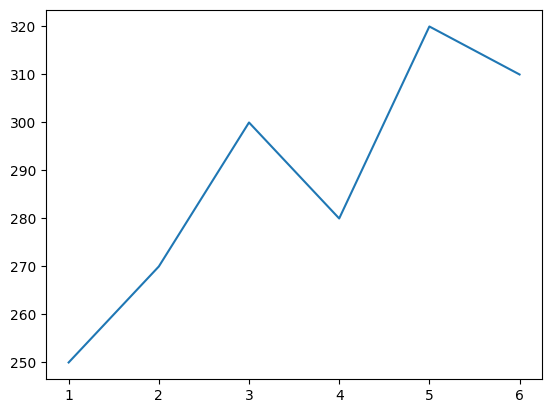

In [69]:
sales_data.plot.line()

### 棒グラフ

カテゴリー間の比較に用いる。

In [70]:
test_data = pd.Series(
    [85, 90, 78, 92, 88, 76],
    index=["Alice", "Bob", "Charlie", "David", "Eve", "Frank"],
)
test_data

,0
Alice,85
Bob,90
Charlie,78
David,92
Eve,88
Frank,76


<Axes: >

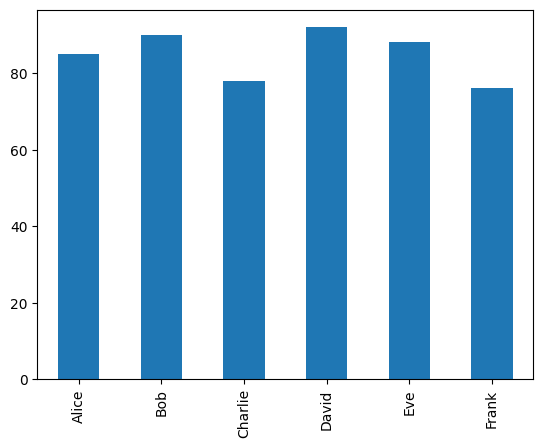

In [71]:
test_data.plot.bar()

### 散布図

2 変数の関係を視覚化する。

In [72]:
study_data = pd.DataFrame(
    {
        "study_hours": [2, 4, 6, 1, 8, 5, 7, 3, 9, 10],
        "test_score": [20, 30, 54, 23, 61, 37, 71, 31, 67, 85],
    }
)
study_data

,study_hours,test_score
0,2,20
1,4,30
2,6,54
3,1,23
4,8,61
5,5,37
6,7,71
7,3,31
8,9,67
9,10,85


<Axes: xlabel='study_hours', ylabel='test_score'>

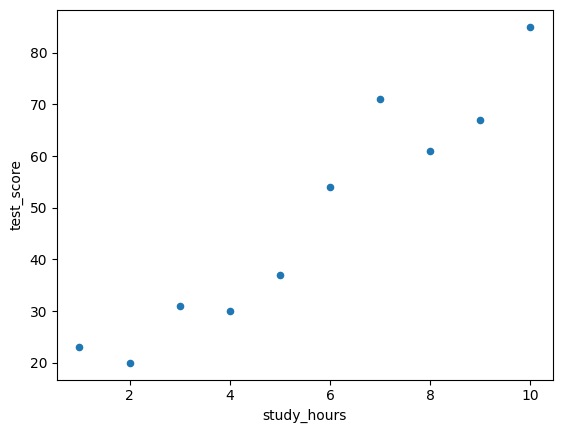

In [73]:
study_data.plot.scatter(
    x = "study_hours",
    y = "test_score",
)

### ヒストグラム

分布の視覚化。

In [74]:
test_data = pd.Series([85, 90, 78, 92, 88, 76, 30, 66, 89, 20, 15],
)
test_data

,0
0,85
1,90
2,78
3,92
4,88
5,76
6,30
7,66
8,89
9,20


<Axes: ylabel='Frequency'>

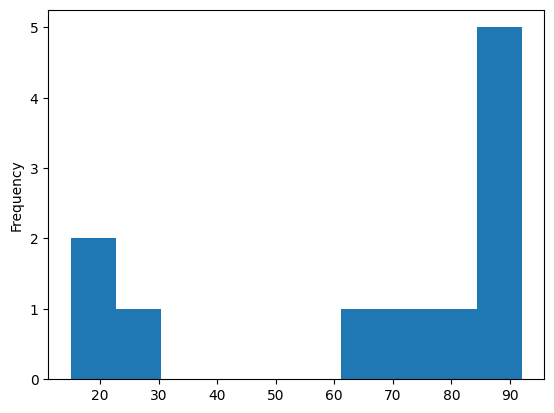

In [75]:
test_data.plot.hist()

### 箱ひげ図

中央値、25, 75 % タイルや異常値などの視覚化。

In [76]:
test_data = pd.DataFrame(
    {
        "Math": [85, 90, 78, 92, 88, 20],
        "Science": [89, 85, 82, 95, 91, 20],
        "English": [76, 88, 85, 90, 84, 15],
    },
    index = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"],
)
test_data

,Math,Science,English
Alice,85,89,76
Bob,90,85,88
Charlie,78,82,85
David,92,95,90
Eve,88,91,84
Frank,20,20,15


<Axes: >

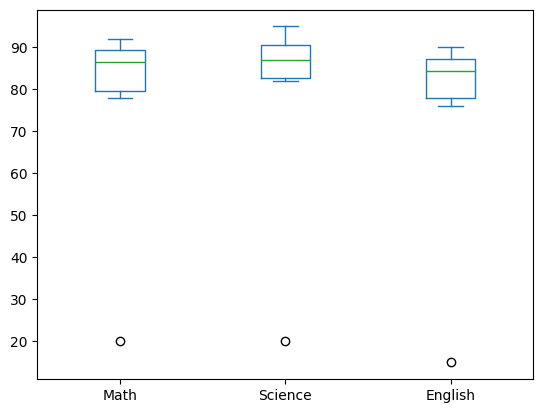

In [77]:
test_data.plot.box()

### 回帰分析

変数間の定量的な関係を分析するために用いる。
かならずしも因果関係を示すわけではないことに注意。

`statsmodels` を使って分析を行う。

最小二乗法は `statsmodels.regression.linear_model` 内の `OLS` クラスを使う。
被説明変数の `Series` と説明変数 (定数項用の 1 からなるカラムも含む) `DataFrame` を渡す。

$y = \alpha + \beta x$ の回帰モデルで推定する場合、`OLS(data["y"], data["intercept", "x"])` となる。

サンプルデータのカリフォルニア住宅データを用いて分析を行う。

`OLS` オブジェクトに対して `fit` メソッドを行うと、推定結果を返す。
これに対して `summary` メソッドを実行すると結果のサマリーを返す。

In [78]:
from statsmodels.regression.linear_model import OLS

In [79]:
housing_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
housing_data["intercept"] = 1 # 定数項用のカラムを追加
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'intercept'],
      dtype='object')

In [80]:
OLS(
    housing_data["median_house_value"],
    housing_data[["intercept", "total_rooms"]],
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     296.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           6.08e-66
Time:                        04:16:49   Log-Likelihood:            -2.2221e+05
No. Observations:               17000   AIC:                         4.444e+05
Df Residuals:                   16998   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.889e+05   1386.257    136.249      0.000    1.86e+05    1.92e+05
total_rooms     6.9694      0.405     17.227      0.000       6.176       7.762
==============================================================================
Omnibus:                     2048.651   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2865.772
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.369   Cond. No.                     5.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""